In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string

In [2]:
df=pd.read_csv('temporary.csv')

In [3]:
df.sample(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2094,2095,Teacher's Assistant,"US, NJ, Hillside, NJ",Education,NaN,NaN,"We are creative daycare center, creating a g...",Post a JobJob includes working closely with st...,Entry Level position that pays minimum wage. ...,0,0,0,NaN,NaN,NaN,NaN,NaN,0
13347,13348,Electrical Controls Engineer,"US, PA, Philadelphia",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0


In [4]:
df.shape

(17880, 18)

In [12]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [13]:
df['title'].nunique()

11231

In [15]:
df.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


In [19]:
df['title'].str.isnumeric().sum()

0

In [4]:
df['location']=df['location'].str.split(',').str[2]

In [5]:
df.sample(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
15829,15830,Kitting & Assembly Associate,Hilliard,K&A,NaN,"Baesman is a nationally-recognized, single-sou...",Summary:Provides hand bindery and packing func...,NaN,We offer an excellent pay and benefits package...,0,1,1,Full-time,Entry level,High School or equivalent,Printing,Production,0
4791,4792,Associate Product Manager,New York,NaN,NaN,Industrial Color Software is a division of Ind...,we're looking for a talented person to join ou...,what skills we are looking for...- someone who...,Employees benefits,0,1,0,Full-time,Associate,Unspecified,Computer Software,Product Management,0


In [6]:
df['title']=df['title'].str.split('(').str[0]

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        Latur\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [10]:
from nltk.corpus import stopwords

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
def hello(w):
    '''w=[r for r in w.split() if r not in string.punctuation]
    w=" ".join(w)'''
    return [r for r in w.split() if r.lower() not in stopwords.words('english') ]

In [11]:
df['title'][34]

'I Want To Work At Karmarama'

In [14]:
hello(df['title'][34])

['Want', 'Work', 'Karmarama']

In [192]:
df['company_profile'].isnull().sum()

2695

In [22]:
temp=df.copy()

In [188]:
df.sample(2)

,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,industry,function,fraudulent,title
3800,269.0,938.0,"twago is a successful, international active IT...",Are you looking for a new project that is both...,What we expect from you:Demonstrable experienc...,What we offer:An ideal environment in which to...,0.0,1.0,1.0,1.0,1.0,62.0,18.0,0.0,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t..."
11784,1597.0,1054.0,Tel Tech Networks is a Voice/Data/Video/Securi...,"Job Description:Installs, troubleshoots, repai...","5+ years telecommunications experience, or 5+ ...",TBD,0.0,1.0,1.0,1.0,1.0,59.0,18.0,0.0,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t..."


In [38]:
df['location'].isnull().sum()

0

In [33]:
from sklearn.impute import SimpleImputer

In [37]:
df['location']=SimpleImputer(strategy='most_frequent').fit_transform(np.array(df['location']).reshape(-1,1))

In [42]:
df['department'].value_counts()

Sales                               551
Engineering                         487
Marketing                           401
Operations                          270
IT                                  225
                                   ... 
NW Portland                           1
Direct Care Team                      1
Sale                                  1
Shipping Dock                         1
Maintenance Technician/Projects       1
Name: department, Length: 1337, dtype: int64

In [48]:
df['department'].isnull().sum()

0

In [47]:
df['department']=SimpleImputer(strategy='most_frequent').fit_transform(np.array(df['department']).reshape(-1,1))

In [52]:
df.drop('salary_range',axis=1,inplace=True)

In [53]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",New York,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",Auckland,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",Wever,Sales,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",Washington,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",Fort Worth,Sales,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [60]:
df['employment_type'].isnull().sum()

3471

In [56]:
df['benefits'].replace(np.nan,'No',inplace=True)

In [63]:
df['employment_type'].value_counts()

Full-time    15091
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [62]:
df['employment_type'].replace(np.nan,'Full-time',inplace=True)

In [64]:
df['required_experience'].value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [67]:
df.drop('required_experience',axis=1,inplace=True)

In [68]:
df.sample(2)

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,industry,function,fraudulent
1175,1176,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",New York,Sales,Gust is a global platform for the sourcing and...,"Gust, the award winning industry-leading platf...",At least three years of experience with Web/In...,No,0,1,0,Full-time,Bachelor's Degree,Internet,Product Management,0
4495,4496,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",Monterey,Sales,NaN,Position: Java Developer IILocation: Monterey ...,Technical Skills:Java Developer Level II At le...,No,0,1,0,Contract,Bachelor's Degree,Information Technology and Services,Information Technology,0


In [82]:
df['has_questions'].value_counts()

0    9088
1    8792
Name: has_questions, dtype: int64

In [83]:
df['has_questions'].isnull().sum()

0

In [86]:
import category_encoders as ce

In [87]:
df.head(3)

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,industry,function,fraudulent
0,1,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",New York,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No,0,1,0,Other,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",Auckland,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,"(0, 3400)\t0.6245013345241588\n (0, 2880)\t...",Wever,Sales,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,No,0,1,0,Full-time,Bachelor's Degree,Information Technology and Services,Information Technology,0


In [114]:
list(df['company_profile'].unique())

["We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.",
 '90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Servic

In [105]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
ll=LabelEncoder().fit(list(df['function'].unique()))

In [125]:
df['function']=ll.transform(df['function'])

In [130]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [27]:
from sklearn.pipeline import Pipeline

In [134]:
temp1=df.copy()

In [135]:
df.drop(['company_profile','description','requirements','benefits'],axis=1,inplace=True)

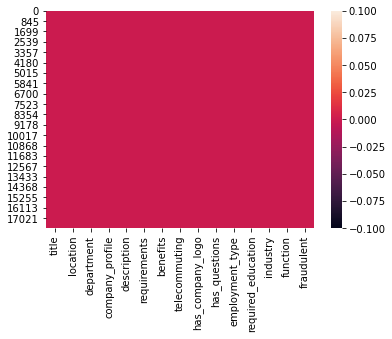

In [206]:
sns.heatmap(df.isnull())

In [146]:
temp1['company_profile']=SimpleImputer(strategy='most_frequent').fit_transform(np.array(temp1['company_profile']).reshape(-1,1))

In [147]:
temp1.dropna(axis=0,inplace=True)

In [151]:
temp1.drop('job_id',axis=1,inplace=True)

In [152]:
temp2=temp1.copy()

In [28]:
from sklearn.model_selection import train_test_split

In [161]:
temp1.drop('title',axis=1,inplace=True)

In [163]:
temp1=pd.concat([temp1,temp['title']])

In [74]:
X=df.drop('fraudulent',axis=1)
y=df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
df.head()

,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_education,industry,function,fraudulent,combined_text
0,1423,758,0,1,0,2,1,59,22,0,0.00000
1,184,1161,0,1,0,1,1,76,7,0,0.04245
2,2160,1054,0,1,0,1,1,59,18,0,0.00000
3,2113,1054,0,1,0,1,1,22,31,0,0.05014
4,766,1054,0,1,1,1,1,51,16,0,0.00000


In [182]:
temp=df.copy()

In [205]:
df=temp2.copy()

In [210]:
df.to_csv('temporary.csv')

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:
df.head(2)

,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_education,industry,function,fraudulent,combined_text
0,1423,758,0,1,0,2,1,59,22,0,"We're Food52, and we've created a groundbreaki..."
1,184,1161,0,1,0,1,1,76,7,0,"90 Seconds, the worlds Cloud Video Production ..."


In [17]:
df['combined_text'] = df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits']

In [22]:
df.drop(['title'],axis=1,inplace=True)

In [59]:
df.sample()

,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_education,industry,function,fraudulent,combined_text
4571,0,1054,0,0,1,1,1,59,18,0,We help teachers get safe &amp; secure jobs ab...


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
vec= TfidfVectorizer(max_features=100, norm='l2',stop_words = 'english')

In [67]:
vec.fit(df['combined_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=100,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [72]:
 df['combined_text'] = np.array(vec.transform(df['combined_text']).toarray(), dtype=np.float16)

In [73]:
df.head()

,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_education,industry,function,fraudulent,combined_text
0,1423,758,0,1,0,2,1,59,22,0,0.00000
1,184,1161,0,1,0,1,1,76,7,0,0.04245
2,2160,1054,0,1,0,1,1,59,18,0,0.00000
3,2113,1054,0,1,0,1,1,22,31,0,0.05014
4,766,1054,0,1,1,1,1,51,16,0,0.00000


In [76]:
ll=LogisticRegression(max_iter=6000).fit(X_train,y_train)

In [79]:
pred=ll.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4548
           1       0.02      0.62      0.04         8

    accuracy                           0.95      4556
   macro avg       0.51      0.79      0.51      4556
weighted avg       1.00      0.95      0.97      4556



In [82]:
ll.score(X_test,y_test)

0.9503950834064969